# Øvelse 3 - Tilbakekoblingsmekanismer (Climate feedbacks)

I denne øvelsen ska vi jobbe med tilbakekoblingsmekanismer - også kennt som klima-feedbacks. 

Tilbakekoblingene kan være positive eller negative; *Positive tilbakekoblinger forsterker den første endringen, mens negative tilbakekoblinger demper endringen.*

Et eksempel på en postiv tilbakekoblingseffekt er 'Is-Albedo effekten' i Arktis: En endring i overflatetemperatur vil føre til økt smeltning av is. Når isen smelter vil den samlede albedo minske idet mer solstråling vil bli absorbert av det mørke havet. Dette fører til en økning i overflatetemperaturen og endda mer is-smeltning. 

I denne øvelsen ska vi slå av og på ulike tilbakeboblingsmekanismer og unnersøke deres effekt på klimaet. 
*Har de en positiv eller negativ effekt på klimaet?* 
*Hva er den samlede affekt av tilbakekoblingseffektene?* 

# Tilbakekoblingseffekter i Toboksmodellen

Vi ska bruke Toboksmodellen til å undersøke hvilken rolle ulike feedbacks har for utviklingen av jordens overflatetemperatur som vi beregner i modellen. Særligt ska vi tilbakekoblingsmekanismer forbunnet med:  

* Den vertikale temperaturgradient i atmosfæren (Lapse rate) 
* Vanndamp 
* Skyer 
* Albedo

Disse er forklart nærmere på kurshjemmesiden unnar `Tilbakekoblingsmekanismer`. 

I modellen er disse tilbakekoblingsmeknismer representert via parametern $\lambda$ [W/(m$^2$K)]. Ut ifra enhetene ser vi at $\lambda$ beskriver hvor mye mer, eller mindre energi, som blir igjen i klimasystemet (i W/m$^2$) for en 1°C endring i temperatur. 

Værdiene vi bruker i modellen er hentet fra komplekse klimamodellene som inngår i IPCC rapporten (see Tabel nedenfor). 

<img src="bilder/table_lambda_values.png" style="width:70%" >

In [6]:
# Lese inn relavente python pakker vi ska bruke
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook # inkluder denne linjen om du vil åpne i Jupyter Notebook og vil lage interaktive plott
%matplotlib inline

from toboks import calculate_temp_anomalies # henter funksjonen som beregner temperaturanomalier basert på toboksmodellen

# Start med å laste inn strålingspådriv

Vi ska bruke det samme historiske strålingspådrivet for perioden 1750-2011 som i den første øvelsen. Det omfatter: 

*   drivhusgasser

*   solinnstråling

*   vulkanisme

*   arealbruk

*   aerosoler (menneskeskapte)

* **Last inn strålingsdata ved å kjøre koden under**


In [5]:
# les inn historisk data fra filen 'historical.csv'
df=pd.read_csv('forcing-files/historical.csv',index_col = 0,sep=',',encoding = "utf-8")

print('Strålingspådriv i W/m2 \n \n', df)

Radiative forcing in W/m2 
 
         wmghg_data  solar_data  volc_data  landuse_data  manaero_data
year                                                                 
1751.0      -0.019      -0.014      0.000         0.000        -0.002
1752.0      -0.018      -0.029      0.000        -0.001        -0.004
1753.0      -0.017      -0.033      0.000        -0.001        -0.005
1754.0      -0.017      -0.043      0.000        -0.002        -0.007
1755.0      -0.016      -0.054     -0.664        -0.002        -0.009
...            ...         ...        ...           ...           ...
2007.0       2.697      -0.017     -0.100        -0.150        -0.907
2008.0       2.728      -0.025     -0.100        -0.150        -0.904
2009.0       2.761      -0.027     -0.125        -0.150        -0.902
2010.0       2.794       0.001     -0.100        -0.150        -0.900
2011.0       2.831       0.030     -0.125        -0.150        -0.900

[261 rows x 5 columns]


## Opgave

Vi ska lage 6 forsøg totalt:

* Forsøk#1: 'Hist_FeedbackPå', Bruk strålingspådriv for perioden 1750-2011 og **alle tilbakekoblingseffekter slået på**. Dette er samme som i øvelsen fra siste uke. 

* Forsøk#2:'Hist_FeedbackAv', Samme som Forsøk#1, men slå av tilbakekoblingseffektene for **Lapse rate**, **Vanndamp**, **Skyer** og **Albedo**. *Stefan Boltzmann effekten* beholder vi på.  
 
* Forsøk#3:'Hist_NoLapseRate', Samme som Forsøk#1, men slå av **Lapse rate**

* Forsøk#4:'Hist_NoVanndamp', Samme som Forsøk#1, men slå av **Vanndamp**

* Forsøk#5:'Hist_NoSkyer', Samme som Forsøk#1, men slå av **Skyer**

* Forsøk#6:'Hist_NoAlbedo', Samme som Forsøk#1, men slå av **Albedo**


**For å slå av en feedback må verdien settes til null** 

 
For hver av disse forsøk beregner og plotter vi endringen i overflatetemperatur. 

In [24]:
# Beregn samlede strålingspådriv og sett verdi for varmeoptakk i havet (gamma)

# Strålingspådriv                                                                                                 
total_forcing = df['wmghg_data']+df['solar_data']+df['volc_data']+df['landuse_data']+df['manaero_data']

# konverter dataframe til data-array                                                                                
radiative_forcing = total_forcing.to_numpy()               

# varmeoptakk i havet [Wm-2K-1]                                                                                                                                                                           #//
gamma=-0.69  


# Sett verdier for tilbakeboblingsmek. (se Tabel)                                                                                               
Summen av de ulike tilbakekoblingseffekter blir lagt inn i modellen som `lambda_sum`. 

**Kør koden unner for å beregne den samlede værdi for tilbakekoblingseffektene**


In [ ]:
# verdier hentet fra Tabel
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  
lambda_vanndamp=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   
lambda_sky=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                       
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]           

# Summen av disse 
lambda_sum=sum([lambda_planck,                                                                                      
    lambda_lapse,                                                                                                   
    lambda_vanndamp,                                                                                                   
    lambda_sky,                                                                                                   
    lambda_albedo])  


In [ ]:
# Vi ka skrive det som en funktion som vi kaller 'calc_lamdba_sum' 

def calc_lambda_sum(lambda_planck,
                    lambda_lapse,
                    lambda_vanndamp,                                                                                                   
                    lambda_sky,
                    lambda_albedo):
    
    '''
        Input: Lamdda-værdier for
                planck,
                lapse rate,
                vanndamp,                                                                                                   
                sky,
                albedo
        
        Output: Sum av lamda-værdiene 
        '''
    
    lambda_sum = sum([lambda_planck,                                                                                      
    lambda_lapse,                                                                                                   
    lambda_vanndamp,                                                                                                   
    lambda_sky,                                                                                                   
    lambda_albedo])
    
    return lambda_sum

In [42]:
### Forsøk #1 - Feedbacks slået på                                                                      
                                                                                                                    
                               
# Summen av lambda (alle er slået på)    
lambda_sum=calc_lambda_sum(lambda_planck, 
                           lambda_lapse,
                           lambda_vanndamp,
                           lambda_sky, 
                           lambda_albedo)                                                                                                  
                                                                                                                    
# kaller opp funksjonen som regner ut temperaturendringene                                                          
Ts, To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)                                  

temp = pd.DataFrame(index=df.index) # vi lager en ny dataramme som har samme indexer (i.e. årstal) som pådrivet
temp['Hist_FeedbackPå']=Ts # samler temperaturdataene i datarammen for enklere plotting vha. pandas


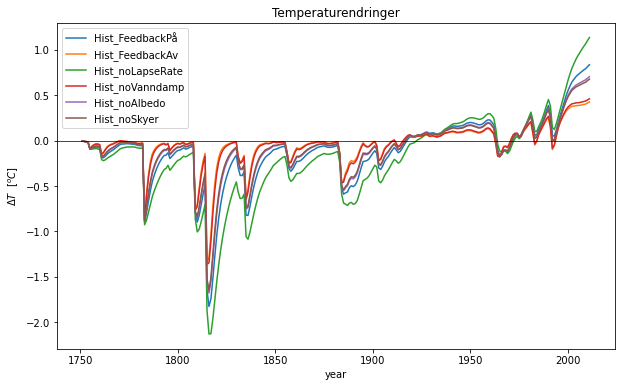

Hist_FeedbackPå i år 2011 : 0.84 °C
Hist_FeedbackAv i år 2011 : 0.43 °C


In [62]:
### Forsøk#2 - Feedbacks slået av

# feedback parameters                                                                                                                                                                                                                 #//
lambda_sum=calc_lambda_sum(lambda_planck, 0, 0, 0, 0)                                                                                            #//
                                                                                                                    
#kaller opp funksjonen som regner ut temperaturendringene                                                          
Ts, To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)

temp['Hist_FeedbackAv']=Ts

temp.plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer",figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black")
plt.show()

print('Hist_FeedbackPå i år', 2011, ':', "%.2f" %(temp['Hist_FeedbackPå'].loc[2011]),'°C')
print('Hist_FeedbackAv i år', 2011, ':', "%.2f" %(temp['Hist_FeedbackAv'].loc[2011]),'°C')


In [44]:
### Forsøk #3: 'Hist_NoLapseRate'

# lapse rate slået av:    
lambda_sum=calc_lambda_sum(lambda_planck, 
                           0,
                           lambda_vanndamp,
                           lambda_albedo, 
                           lambda_sky)   

#kaller opp funksjonen som regner ut temperaturendringene                                                          
Ts, To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)

temp['Hist_noLapseRate']=Ts
                            

In [45]:
###  Forsøk#4:'Hist_NoVanndamp'

# vanndamp slået av:    
lambda_sum=calc_lambda_sum(lambda_planck, 
                           lambda_lapse,
                           0,
                           lambda_albedo, 
                           lambda_sky)    

#kaller opp funksjonen som regner ut temperaturendringene                                                          
Ts, To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)

temp['Hist_noVanndamp']=Ts
                           

In [46]:
###  Forsøk#5:'Hist_NoAlbedo'

# albedo slået av:    
lambda_sum=calc_lambda_sum(lambda_planck, 
                           lambda_lapse,
                           lambda_vanndamp,
                           0, 
                           lambda_sky)    

#kaller opp funksjonen som regner ut temperaturendringene                                                          
Ts, To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)

temp['Hist_noAlbedo']=Ts
                           

In [47]:
###  Forsøk#6:'Hist_NoSkyer'

# albedo slået av:    
lambda_sum=calc_lambda_sum(lambda_planck, 
                           lambda_lapse,
                           lambda_vanndamp,
                           lambda_albedo, 
                           0)    

#kaller opp funksjonen som regner ut temperaturendringene                                                          
Ts, To = calculate_temp_anomalies(radiative_forcing, lambda_sum, gamma)

temp['Hist_noSkyer']=Ts

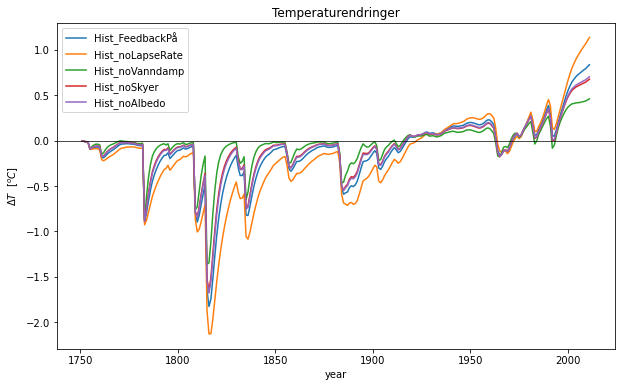

In [50]:
# plot temperaturendringer for Forsøk#1 og #3-4
temp['Hist_FeedbackPå'].plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer",figsize=(10,6))

temp['Hist_noLapseRate'].plot()
temp['Hist_noVanndamp'].plot()
temp['Hist_noSkyer'].plot()
temp['Hist_noAlbedo'].plot()

plt.axhline(y=0, linewidth=0.7, color="black")
plt.legend()
plt.show()

# Spørgsmål til opgaven

* Hvilken tilbakekoblingsmekanisme har den største effekt på temperaturen?

* For hver tilbakekoblingsmekanisme: er det en positiv eller negativ feedback? Kan du forklare hvorfor?


## Finn temperaturendringen i år 2011

In [56]:
# velg år
år = 2011

# vi bruker en løkke som looper over navne
namelist = ['Hist_noLapseRate','Hist_noVanndamp', 'Hist_noSkyer', 'Hist_noAlbedo']

# beregn temperaturendringen i forhold til situationen hvor alle feedbacks er slået på
for i, varname in enumerate(namelist):
    Tloc = temp[varname].loc[år] - temp['Hist_FeedbackPå'].loc[år] # finn tempperaturendring i 'year'
    print(varname, 'i år', år, ':', "%.2f" %(Tloc),'°C')

Hist_noLapseRate i år 2011 : 0.30 °C
Hist_noVanndamp i år 2011 : -0.38 °C
Hist_noSkyer i år 2011 : -0.16 °C
Hist_noAlbedo i år 2011 : -0.13 °C


*Vanndamp*
Her er det tydeligt at vanndamp er den kraftigste feedback. Uten effekten fra vanndamp ville temperaturendringen være **0.38°C lavere** i 2011. Vanndamp er altså med til at *forsterke* effekten av en temperatur endring (positiv feedback). 

**Hvorfor?** Vanndamp er en viktig drivhusgas; Vanndamp absorberer den innkommende solstråling og gir en økning i temperatur. Når temperaturen øker kan luften inneholde mer vanndamp (Clausius-Clapeyron effekten) og fører til yderligere oppvarming.   

*Lapse rate*
LapseRate bidrar med 0.30°C. Det er en positiv verdi, hvilket betyr at det er med til at minske temperaturendringen (altså en negativ feedback). 

**Hvorfor?** Dette er relatert til vanndamp. En økning i atmosfærisk vanndamp har større påvirkning på temperaturen ved toppen av atmosfæren enn ved jordoverflaten. Dette fører til en økt vertikal temperatur gradient i atmosfæren, hvilket bidrar til mer effektivt tap av energi fra atmosfæren og ut i verdensrommet.

*Skyer*
Skyer bidrar til å øke temperaturen med 0.16°C (positiv feedback). 
**Hvorfor?** Når temperaturen eksempelvis øker vil der feks bli mer fordamping og der kan dannes flere skyer. Hvor skyene dannes har dog stor betydning og der er fremdeles stor usikkerhet forbundet med de. Der er dog konsensus at skyer totalt set er en positiv tilbakekoblingseffekt (se https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_SPM_FINAL.pdf). 

*Albedo*
Albedo gir en temperaturøkning på 0.13°C (positiv feedback). Samlet sett vil jordens albedo minske når temperaturen stiger. 

**Hvorfor?** Èn av de primære årsakene til dette er endringer i snø- og isdekke i de polare områdene. Når temperaturen eksempelvis øker vil der reflekteres mindre solinnstråling fra jordens overflate og derfor bidra til en økning i temperaturen.     


Tilsammens bidrar tilbakekoblingsmekanismene til å forsterke temperaturendringen. Uten feedbacks ville temperaturen i år 2011 bare ha økt 0.43°C i forhold til 0.84°C hvis alle feedbacks er inkludert. Dette er en fordobling! Tilbakjekoblingsmekanismer spiller altså en viktig rolle for klimaet's følsomhet til endringer i temperatur. 



### 3 - For further reflection (ideer til 0reflektionsnotat)

* In this simple model the feedback factors are constant in time. Discuss the potential problems with this assumption.

* Can you think of other important feedback mechanisms that are not included in the TwoBox model?